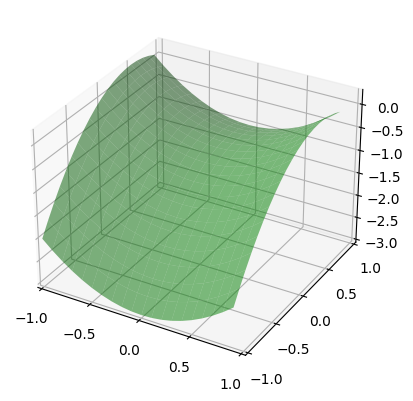

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    38.13          458.578        5         0.320666         0.556764      1.16m
   1     9.94          1.29647        7         0.312155         0.645116     37.82s
   2     6.86         0.762579        7         0.303603         0.589554     33.59s
   3     4.68         0.577949        5         0.290938         0.824311     30.40s
   4     4.32         0.565883        7         0.291902         0.694866     29.93s
   5     4.40          0.55062        7         0.263165         0.683437     27.26s
   6     4.51         0.601678        7         0.270934         0.613516     27.95s
   7     4.73         0.588047        7         0.262264         0.691549     27.67s
   8     5.14         0.605741        7         0.246291         0.359121  

In [1]:
#%matplotlib inline
from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils.random import check_random_state
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import graphviz

# Ground truth
x0 = np.arange(-1, 1, .1)
x1 = np.arange(-1, 1, .1)
x0, x1 = np.meshgrid(x0, x1)
y_truth = x0**2 - x1**2 + x1 - 1

ax = plt.figure().add_subplot(projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xticks(np.arange(-1, 1.01, .5))
ax.set_yticks(np.arange(-1, 1.01, .5))
surf = ax.plot_surface(x0, x1, y_truth, rstride=1, cstride=1, color='green', alpha=0.5)
plt.show()

rng = check_random_state(0)

# Training samples
X_train = rng.uniform(-1, 1, 100).reshape(50, 2)
y_train = X_train[:, 0]**2 - X_train[:, 1]**2 + X_train[:, 1] - 1

# Testing samples
X_test = rng.uniform(-1, 1, 100).reshape(50, 2)
y_test = X_test[:, 0]**2 - X_test[:, 1]**2 + X_test[:, 1] - 1

est_gp = SymbolicRegressor(population_size=5000,
                           generations=20, stopping_criteria=0.01,
                           p_crossover=0, p_subtree_mutation=0,
                           p_hoist_mutation=0, p_point_mutation=1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(X_train, y_train)

print(est_gp._program)

# est_tree = DecisionTreeRegressor()
# est_tree.fit(X_train, y_train)
# est_rf = RandomForestRegressor(n_estimators=10)
# est_rf.fit(X_train, y_train)

# y_gp = est_gp.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
# score_gp = est_gp.score(X_test, y_test)
# y_tree = est_tree.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
# score_tree = est_tree.score(X_test, y_test)
# y_rf = est_rf.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
# score_rf = est_rf.score(X_test, y_test)

# fig = plt.figure(figsize=(12, 10))

# for i, (y, score, title) in enumerate([(y_truth, None, "Ground Truth"),
#                                        (y_gp, score_gp, "SymbolicRegressor"),
#                                        (y_tree, score_tree, "DecisionTreeRegressor"),
#                                        (y_rf, score_rf, "RandomForestRegressor")]):

#     ax = fig.add_subplot(2, 2, i+1, projection='3d')
#     ax.set_xlim(-1, 1)
#     ax.set_ylim(-1, 1)
#     ax.set_xticks(np.arange(-1, 1.01, .5))
#     ax.set_yticks(np.arange(-1, 1.01, .5))
#     surf = ax.plot_surface(x0, x1, y, rstride=1, cstride=1, color='green', alpha=0.5)
#     points = ax.scatter(X_train[:, 0], X_train[:, 1], y_train)
#     if score is not None:
#         score = ax.text(-.7, 1, .2, "$R^2 =\/ %.6f$" % score, 'x', fontsize=14)
#     plt.title(title)

# plt.show()

# dot_data = est_gp._program.export_graphviz()
# graph = graphviz.Source(dot_data)
# graph.render('images/ex1_child', format='png', cleanup=True)
# grap